良/恶性性乳腺癌肿瘤预测

In [11]:
import pandas as pd
df_test = pd.read_csv('breast-cancer-test.csv')
df_train = pd.read_csv('breast-cancer-train.csv')
df_train.head()

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,163,1,1,0
1,286,10,10,1
2,612,10,10,1
3,517,1,1,0
4,464,1,1,0


In [12]:
df_train.shape

(524, 4)

In [13]:
# 这两步命令主要意思是在 df_test 数据框中选出 Type 为 0 的 Clump Thickness 和 Cell Size 值，
# 组成一个数据框并且存至 df_test_negative 变量，同样 Type 为 1 的存入 df_test_positive 变量，分别表示阴性和阳性
df_test_negative = df_test[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]
df_test_negative.head()

,Clump Thickness,Cell Size
0,1,2
1,1,1
2,1,1
4,1,1
5,1,1


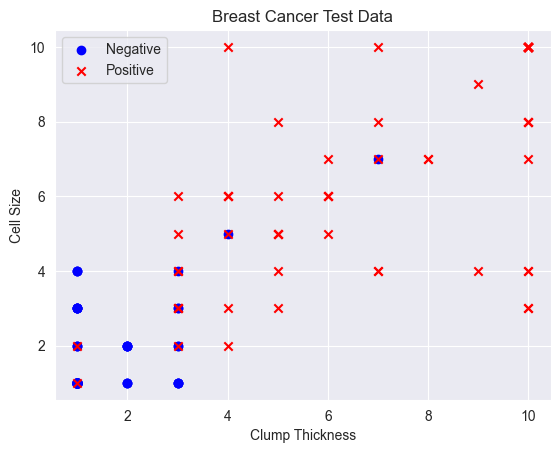

In [14]:
import matplotlib.pyplot as plt
#用法：plt.scatter(数据集名['列名（横坐标）'],数据集名['列名（横坐标）'], marker = ' （记号）', s=（大小）, c='颜色')
plt.scatter(df_test_negative ['Clump Thickness'], df_test_negative ['Cell Size'], c='b', marker='o', label='Negative')
plt.scatter(df_test_positive ['Clump Thickness'], df_test_positive ['Cell Size'], c='r', marker='x', label='Positive')
plt.title('Breast Cancer Test Data')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.legend()
plt.show()

随机生成一个线性模型，拟合数据集，并绘制拟合曲线。

[0.5488135]


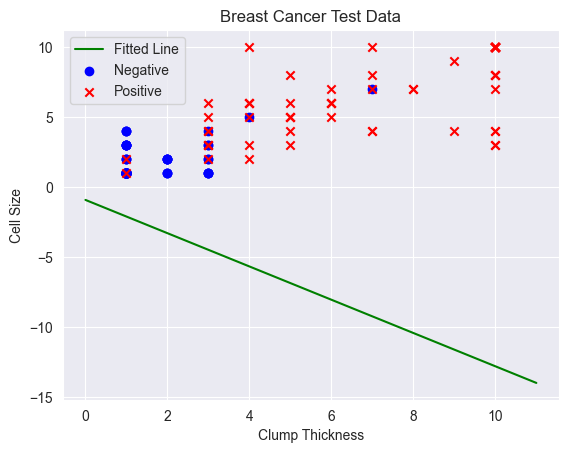

In [15]:
import numpy as np
np.random.seed(0)
#用 random 函数产生一个随机数并存入 intercept 变量，作为直线截距
intercept = np.random.random([1])
#用 random 函数产生两个随机数并存入 coef 变量，作为系数
coef = np.random.random([2])

#打印出这个随机数
print(intercept)

#产生一个 0 到 11 ，即 0 ...11的序列存入 lx
lx = np.arange(0, 12)
#利用随机生成的 intercept coef[0] coef[1] 计算 ly,  coef[0]x+coef[1]y=intercept
ly = (-intercept - lx * coef[0]) / coef[1]
#用 plt.plot 画出拟合曲线
plt.plot(lx, ly, c='g', label='Fitted Line')
plt.scatter(df_test_negative ['Clump Thickness'], df_test_negative ['Cell Size'], c='b', marker='o', label='Negative')
plt.scatter(df_test_positive ['Clump Thickness'], df_test_positive ['Cell Size'], c='r', marker='x', label='Positive')
plt.title('Breast Cancer Test Data')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.legend()
plt.show()

使用 10 条训练数据，训练一个 logistic 回归分类器

Accuracy: 0.8857142857142857


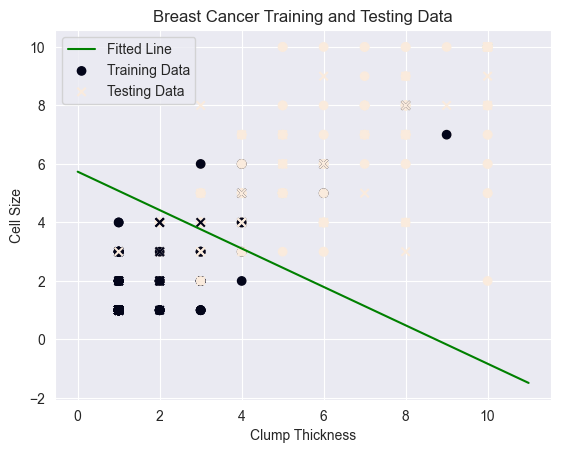

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#用 train_test_split 函数将数据集分为训练集和测试集，训练集占 80%，测试集占 20%
X_train, X_test, y_train, y_test = train_test_split(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'], test_size=0.2, random_state=0)

#用 LogisticRegression 建立一个 logistic 回归分类器
lr = LogisticRegression(random_state=0)
#用训练集训练分类器
lr.fit(X_train, y_train)
#用测试集测试分类器
y_pred = lr.predict(X_test)
#lr.score:将训练出的 lr 模型应用于指定数据，返回正确率
print('Accuracy:', lr.score(X_test, y_test))

#返回 lr 模型的截距;一个只包含一个数的 array
intercept = lr.intercept_
#返回 lr 模型的斜率；包含两个数的 array
coef = lr.coef_[0]
#产生一个 0 到 11 ，即 0 ...11的序列存入 lx
lx = np.arange(0, 12)
#利用 intercept coef[0] coef[1] 计算 ly,  coef[0]x+coef[1]y=intercept
# 给出线性模型表达式
ly = (-intercept - lx * coef[0]) / coef[1]
#用 plt.plot 画出拟合曲线
plt.plot(lx, ly, c='g', label='Fitted Line')
# 用 plt.scatter 画出训练集和测试集的散点图
plt.scatter(df_test_negative ['Clump Thickness'], df_test_negative ['Cell Size'], c='b', marker='o', label='Negative')
plt.scatter(df_test_positive ['Clump Thickness'], df_test_positive ['Cell Size'], c='r', marker='x', label='Positive')
plt.title('Breast Cancer Training and Testing Data')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.legend()
plt.show()


使用所有训练数据，训练一个 logistic 回归分类器

Accuracy: 0.9371428571428572


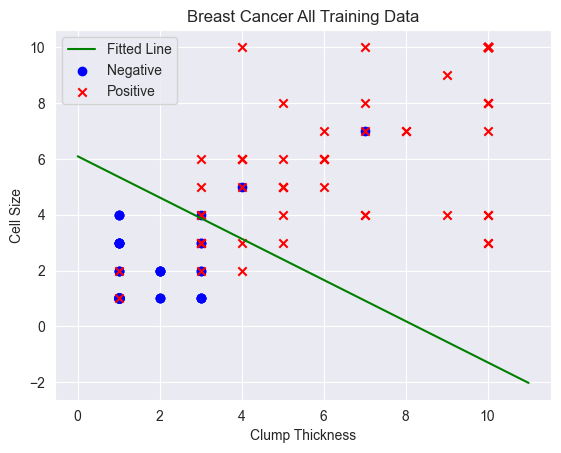

In [29]:
lr = LogisticRegression(random_state=0)
lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print('Accuracy:', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

intercept = lr.intercept_
coef = lr.coef_[0]
lx = np.arange(0, 12)

ly = (-intercept - lx * coef[0]) / coef[1]
plt.plot(lx, ly, c='g', label='Fitted Line')
plt.scatter(df_test_negative ['Clump Thickness'], df_test_negative ['Cell Size'], c='b', marker='o', label='Negative')
plt.scatter(df_test_positive ['Clump Thickness'], df_test_positive ['Cell Size'], c='r', marker='x', label='Positive')
plt.title('Breast Cancer All Training Data')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.legend()
plt.show()